In [ ]:
import io
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import statistics
import pickle
import joblib
import tensorflow

#for metrics
import sklearn.metrics as metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import plot_confusion_matrix

#cross validation
from sklearn.model_selection import StratifiedKFold
#classifier algo
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from sklearn.ensemble import RandomForestClassifier

#import keras

from matplotlib import pyplot as plt
import glob
import random
# import segmentation_models_3D as sm
#keras metrics

from keras.metrics import MeanIoU
#keras models

from keras.models import load_model
from matplotlib import pyplot as plt

import csv

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

my_drive = '/content/gdrive/My Drive/'
import sys
sys.path.append(my_drive)

Mounted at /content/gdrive


In [ ]:
clf_dir= '/content/gdrive/My Drive/Brats 2019/CLF_testing_data.csv'

seg_dir= '/content/gdrive/My Drive/Brats 2019/Processed_images/'

seg_model = load_model('/content/gdrive/My Drive/PJ_BrainTumor_Dataset/BraTS2020_TrainingData/saved models/brats_3d_100_updated.hdf5',
                      compile=False)

clf_model = joblib.load('/content/gdrive/My Drive/Brats 2018/MICCAI_BraTS_2018_Data_Training/RFC_PCA_model_01.pkl')

tester = pd.read_csv(clf_dir)
t1 = tester.drop("Unnamed: 0", axis=1)
Y = t1["GRADE"]
t1 = t1.drop("GRADE", axis=1)
t1 = t1.drop("CASE", axis=1)
t1.head()
t1 = (t1 - t1.min()) / (t1.max() - t1.min())

Prediction Tumor Grade:  Low Grade Glioblastoma
Given Tumor Grade:  Low Grade Glioblastoma

Given mask shape:  (128, 128, 128)
Predicted mask shape:  (128, 128, 128)
Labels:  [0 1 2 3]
Slice:  55


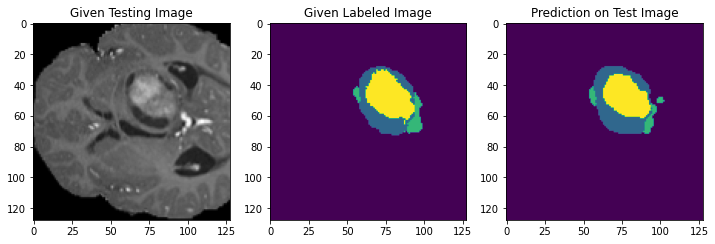

In [ ]:
img_num = 27

img_num -=1
X_master=t1.iloc[img_num].to_numpy()
X_master = np.reshape(X_master,(1, X_master.size))
#print(clf_model.predict(X_master))
pred= clf_model.predict(X_master)

if pred == [1]:
  pred_grade = 'High Grade Glioblastoma'

if pred == [0]:
  pred_grade = 'Low Grade Glioblastoma'

if Y[img_num] == 1:
  given_grade = 'High Grade Glioblastoma'
  n_slice= 80

if Y[img_num] == 0:
  given_grade = 'Low Grade Glioblastoma'
  n_slice= 55



test_img = np.load(seg_dir + "input_data_3channels/images/image_"+str(img_num)+".npy")

test_mask = np.load(seg_dir + "input_data_3channels/masks/mask_"+str(img_num)+".npy")
test_mask_argmax=np.argmax(test_mask, axis=3)

test_img_input = np.expand_dims(test_img, axis=0)
test_prediction = seg_model.predict(test_img_input)
test_prediction_argmax=np.argmax(test_prediction, axis=4)[0,:,:,:]

print("Prediction Tumor Grade: ",pred_grade)
print("Given Tumor Grade: ", given_grade)

print("\nGiven mask shape: ", test_prediction_argmax.shape)
print("Predicted mask shape: ",test_mask_argmax.shape)
print("Labels: ", np.unique(test_prediction_argmax))

#n_slice=random.randint(0, test_prediction_argmax.shape[2])
#n_slice = 90
print("Slice: ", n_slice)

plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Given Testing Image')
plt.imshow(test_img[:,:,n_slice,1], cmap='gray')
plt.subplot(232)
plt.title('Given Labeled Image')
plt.imshow(test_mask_argmax[:,:,n_slice])
plt.subplot(233)
plt.title('Prediction on Test Image')
plt.imshow(test_prediction_argmax[:,:, n_slice])
plt.show()

# print("Features: ", clf_model.feature_names_in_.tolist())
